In [1]:
import pandas as pd
data=pd.read_csv("salary.csv")

In [2]:
data

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [3]:
data.drop("Name",axis=1,inplace=True)

In [4]:
data.drop("Number",axis=1,inplace=True)

In [6]:
list1=["Team","Position","DOJ","College"]
from sklearn.preprocessing import LabelEncoder

oe=LabelEncoder()

for val in list1:
    data[val]=oe.fit_transform(data[val].astype(str))

In [7]:
data

,Team,Position,Age,DOJ,Weight,College,Salary
0,1,2,25,4,180,93,7730337.0
1,1,3,25,7,235,52,6796117.0
2,1,4,27,9,205,8,NaN
3,1,4,22,9,185,33,1148640.0
4,1,1,29,11,231,118,5000000.0
...,...,...,...,...,...,...,...
452,28,1,20,11,234,45,2239800.0
453,28,2,26,8,203,11,2433333.0
454,28,2,24,5,179,118,900000.0
455,28,0,26,15,256,118,2900000.0


In [8]:
import seaborn as sns

In [10]:
data.isnull().sum()

Team         0
Position     0
Age          0
DOJ          0
Weight       0
College      0
Salary      11
dtype: int64

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer
mp = SimpleImputer(missing_values=np.nan, strategy='mean')
data["Salary"]=mp.fit_transform(data["Salary"].values.reshape(-1,1))

In [12]:
data

,Team,Position,Age,DOJ,Weight,College,Salary
0,1,2,25,4,180,93,7.730337e+06
1,1,3,25,7,235,52,6.796117e+06
2,1,4,27,9,205,8,4.842684e+06
3,1,4,22,9,185,33,1.148640e+06
4,1,1,29,11,231,118,5.000000e+06
...,...,...,...,...,...,...,...
452,28,1,20,11,234,45,2.239800e+06
453,28,2,26,8,203,11,2.433333e+06
454,28,2,24,5,179,118,9.000000e+05
455,28,0,26,15,256,118,2.900000e+06


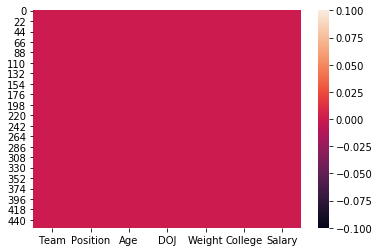

In [13]:
sns.heatmap(data.isnull())

Team            AxesSubplot(0.125,0.71587;0.352273x0.16413)
Position     AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Age            AxesSubplot(0.125,0.518913;0.352273x0.16413)
DOJ         AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Weight         AxesSubplot(0.125,0.321957;0.352273x0.16413)
College     AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Salary            AxesSubplot(0.125,0.125;0.352273x0.16413)
dtype: object

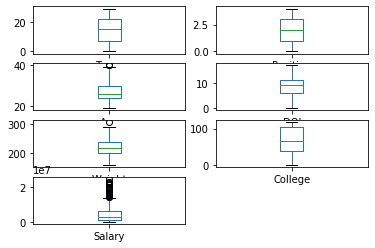

In [14]:
data.plot(kind="box",subplots=True,layout=(4,2))

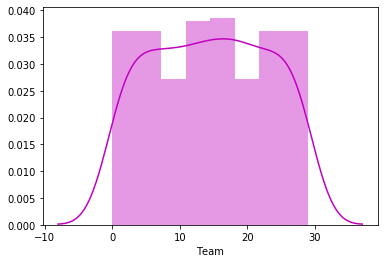

In [15]:
sns.distplot(data["Team"],color="m")

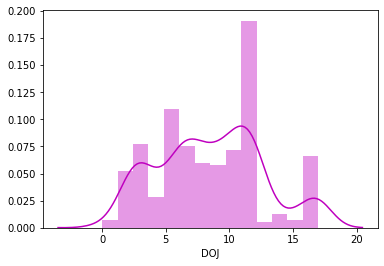

In [16]:
sns.distplot(data["DOJ"],color="m")

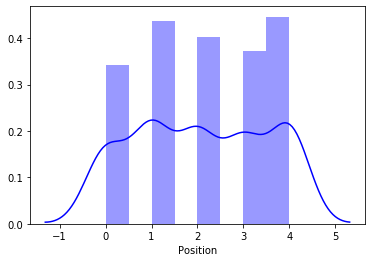

In [17]:
sns.distplot(data["Position"],color="b")

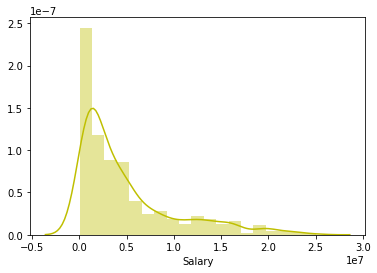

In [18]:
sns.distplot(data["Salary"],color="y")

In [19]:
data.skew()

Team       -0.007368
Position   -0.014795
Age         0.626349
DOJ         0.192022
Weight      0.113788
College    -0.127550
Salary      1.595511
dtype: float64

In [24]:
from scipy.stats import boxcox
data["Salary"]=boxcox(data["Salary"],0)

In [25]:
data["Salary"].skew()

-0.4501069721112204

In [26]:
data.skew()

Team       -0.007368
Position   -0.014795
Age         0.626349
DOJ         0.192022
Weight      0.113788
College    -0.127550
Salary     -0.450107
dtype: float64

In [27]:
data["Age"]=boxcox(data["Age"],0)

In [28]:
data.skew()

Team       -0.007368
Position   -0.014795
Age         0.272628
DOJ         0.192022
Weight      0.113788
College    -0.127550
Salary     -0.450107
dtype: float64

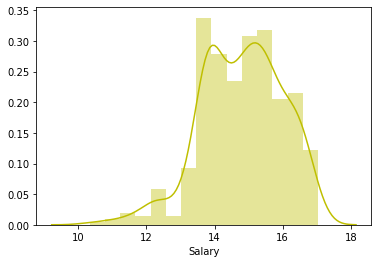

In [29]:
sns.distplot(data["Salary"],color="y")

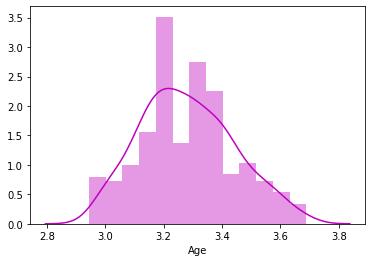

In [30]:
sns.distplot(data["Age"],color="m")

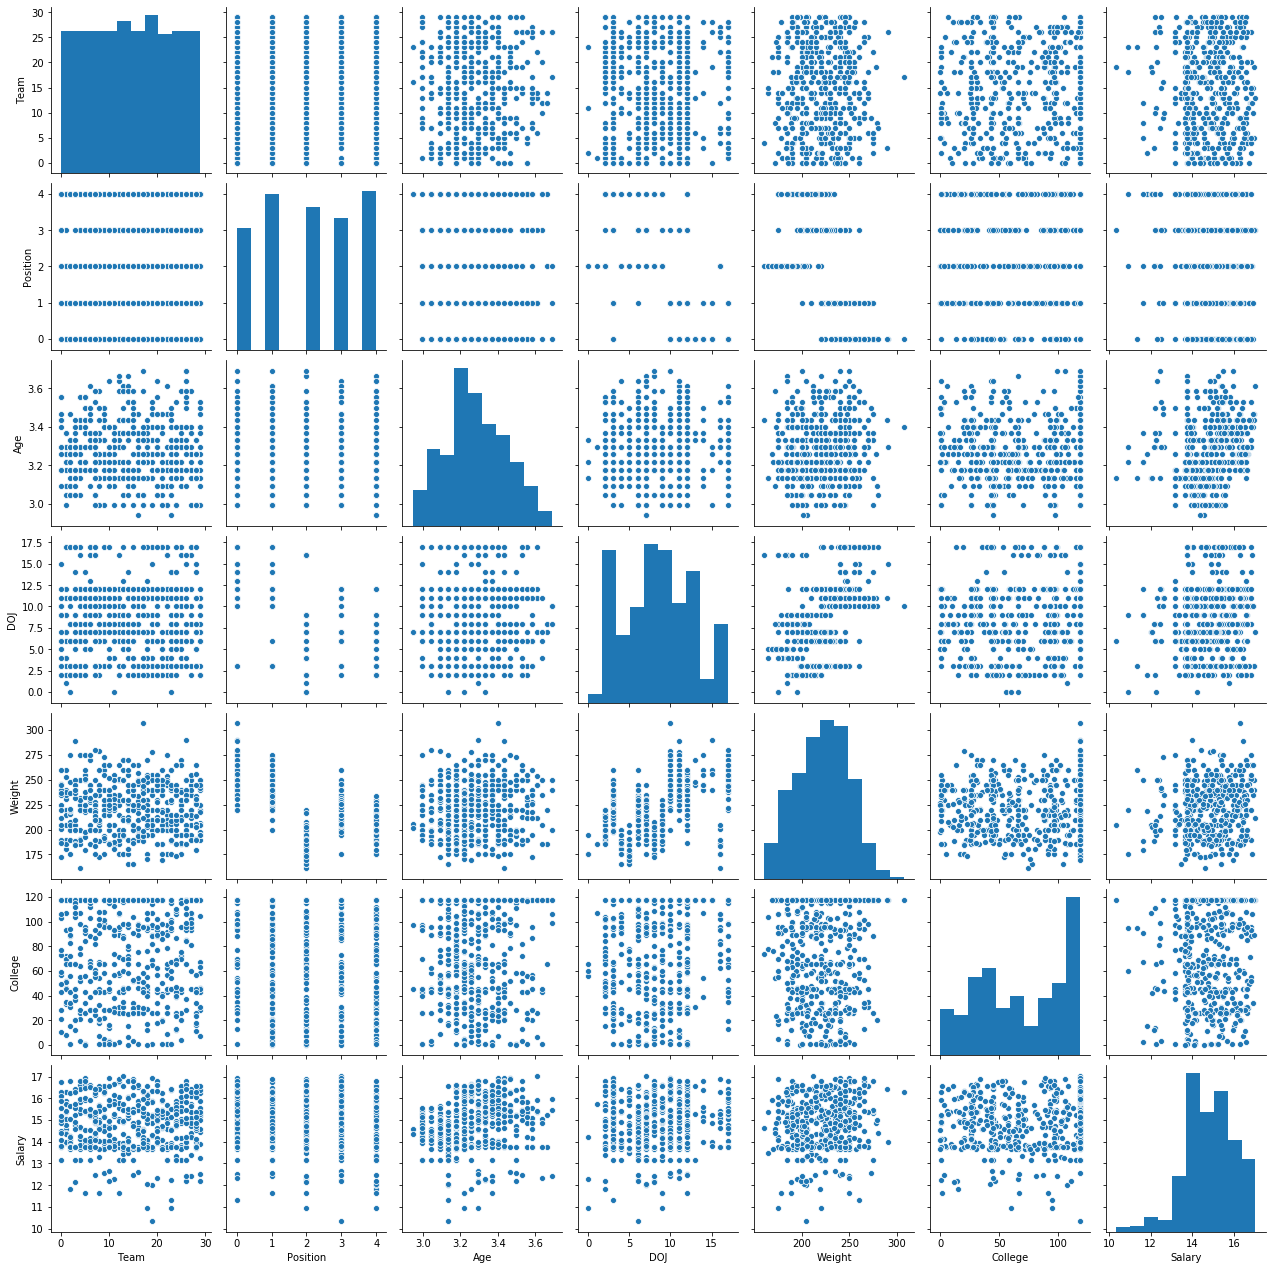

In [31]:
sns.pairplot(data)

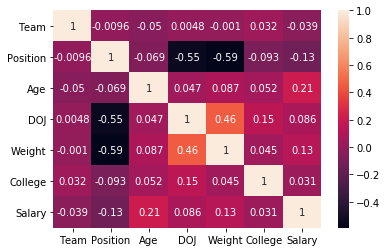

In [32]:
sns.heatmap(data.corr(),annot=True)


In [33]:
data

,Team,Position,Age,DOJ,Weight,College,Salary
0,1,2,3.218876,4,180,93,15.860663
1,1,3,3.218876,7,235,52,15.731862
2,1,4,3.295837,9,205,8,15.392979
3,1,4,3.091042,9,185,33,13.954087
4,1,1,3.367296,11,231,118,15.424948
...,...,...,...,...,...,...,...
452,28,1,2.995732,11,234,45,14.621896
453,28,2,3.258097,8,203,11,14.704772
454,28,2,3.178054,5,179,118,13.710148
455,28,0,3.258097,15,256,118,14.880221


Team            AxesSubplot(0.125,0.71587;0.352273x0.16413)
Position     AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Age            AxesSubplot(0.125,0.518913;0.352273x0.16413)
DOJ         AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Weight         AxesSubplot(0.125,0.321957;0.352273x0.16413)
College     AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Salary            AxesSubplot(0.125,0.125;0.352273x0.16413)
dtype: object

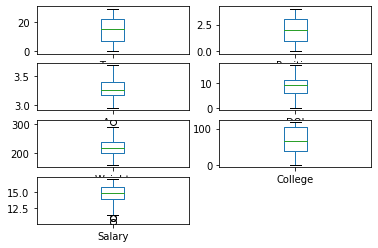

In [34]:
data.plot(kind="box",subplots=True,layout=(4,2))

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.57366745, 0.05138118, 0.38765053, ..., 1.57645405, 0.6475773 ,
        0.88822598],
       [1.57366745, 0.66017031, 0.38765053, ..., 0.51166634, 0.44416787,
        0.78062071],
       [1.57366745, 1.37172179, 0.09503516, ..., 0.62730842, 1.61579683,
        0.4975056 ],
       ...,
       [1.56882854, 0.05138118, 0.64367868, ..., 1.61441988, 1.31327557,
        0.90839515],
       [1.56882854, 1.47448415, 0.14166533, ..., 1.30894867, 1.31327557,
        0.0691277 ],
       [1.56882854, 1.47448415, 0.14166533, ..., 0.35980304, 0.68381925,
        0.86562422]])

In [36]:
threshold=3
print(np.where(z>3))

(array([ 32, 130, 291, 405], dtype=int64), array([6, 6, 6, 4], dtype=int64))


In [37]:
data=data[(z<3).all(axis=1)]

In [38]:
data

,Team,Position,Age,DOJ,Weight,College,Salary
0,1,2,3.218876,4,180,93,15.860663
1,1,3,3.218876,7,235,52,15.731862
2,1,4,3.295837,9,205,8,15.392979
3,1,4,3.091042,9,185,33,13.954087
4,1,1,3.367296,11,231,118,15.424948
...,...,...,...,...,...,...,...
452,28,1,2.995732,11,234,45,14.621896
453,28,2,3.258097,8,203,11,14.704772
454,28,2,3.178054,5,179,118,13.710148
455,28,0,3.258097,15,256,118,14.880221


Team            AxesSubplot(0.125,0.71587;0.352273x0.16413)
Position     AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Age            AxesSubplot(0.125,0.518913;0.352273x0.16413)
DOJ         AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Weight         AxesSubplot(0.125,0.321957;0.352273x0.16413)
College     AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Salary            AxesSubplot(0.125,0.125;0.352273x0.16413)
dtype: object

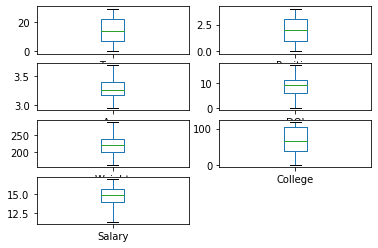

In [39]:
data.plot(kind="box",subplots=True,layout=(4,2))

In [40]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [49]:

    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.22)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    print(r2_score(y_test,pred))
    

0.06577869291881366


In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [59]:
lg.coef_

array([-0.01248244, -0.05864006,  0.17374958, -0.00535195,  0.11040198,
        0.03997283])

In [60]:
lg.intercept_


14.809781332290692

In [63]:
print("Mean absolute error :",mean_absolute_error(y_test,pred))

Mean absolute error : 0.8870548915530282


In [64]:
print("Mean squared absolute error :",mean_absolute_error(y_test,pred))

Mean squared absolute error : 0.8870548915530282


In [65]:
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))

Root mean squared error:  1.0942384703681474


In [67]:
from sklearn.linear_model import Lasso,Ridge

In [71]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.04507541750727828

In [72]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.04538114190674747